In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from RKHS import GPMI

from utils import RandomUnifBall

from Algorithms import incremental_greedy

from LocalImprove import u_local_improve

from functools import partial


import pickle as pkl

%load_ext autoreload
%autoreload 2

# Experiment parameters

In [2]:
T = 10

c = 1
l = 1
var_0 = 0.01


search_region_center = np.array([0.,0.])
search_region_radius = 3
step_size = 1

# The reference system.
ref = np.array([[0,0]]) # A single point reference set.
R = np.array([search_region_radius*np.ones(T)]).T
R[0,0] = 0

N = len(ref)

x0 = search_region_center

# Callables

In [3]:
x_objective = partial(GPMI,c=c,l=l,var_0=var_0)

# u local improvement

In [4]:
straight_line = step_size*np.array([np.arange(T),np.zeros(T)]).T+x0

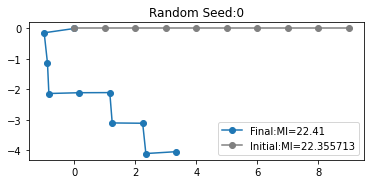

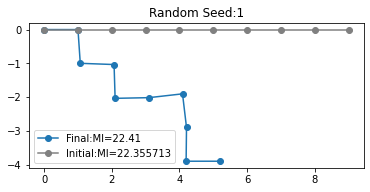

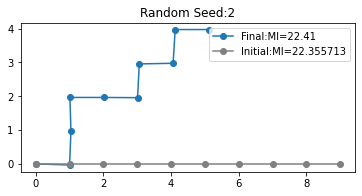

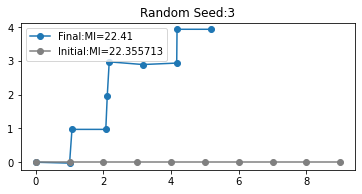

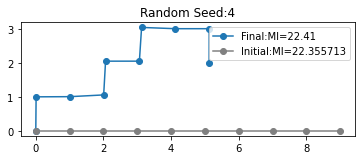

In [18]:
straight_line = step_size*np.array([np.arange(T),np.zeros(T)]).T+x0

iniMI = x_objective(np.array([straight_line]))[0]

n_pass = 5


for seed in range(5):
    
    x = np.array(straight_line)
    np.random.seed(seed)

    x =  u_local_improve(x,x_objective,step_size,ref,R=np.ones((T,len(ref)))*100,n_pass = n_pass)

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(straight_line[:,0],straight_line[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')

    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))

    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

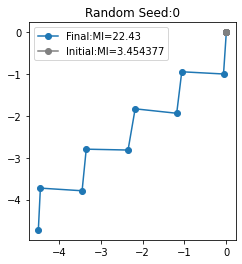

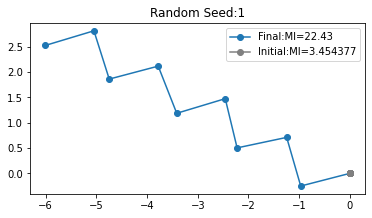

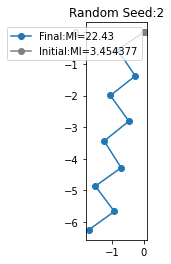

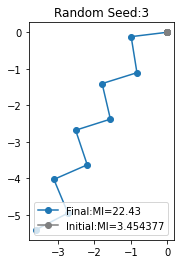

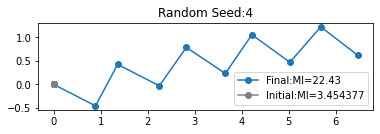

In [8]:
zero = step_size*np.zeros((T,2))

iniMI = x_objective(np.array([zero]))[0]

n_pass = 1


for seed in range(5):
    
    x = np.array(zero)
    np.random.seed(seed)

    x =  u_local_improve(x,x_objective,step_size,ref,R=np.ones((T,len(ref)))*100,n_pass = n_pass)

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.2f}'.format(MI))
    plt.plot(zero[:,0],zero[:,1],marker='o',label = 'Initial:MI={:2f}'.format(iniMI),color = 'grey')

    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))

    plt.legend()
    plt.gca().set_aspect('equal')
    plt.show()

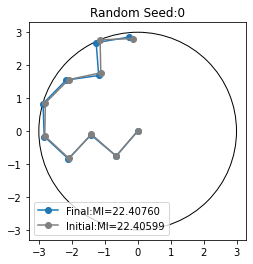

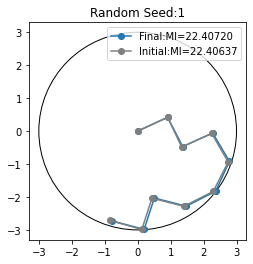

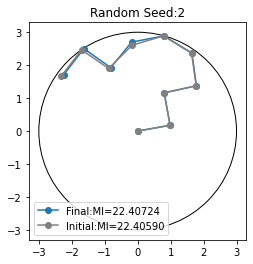

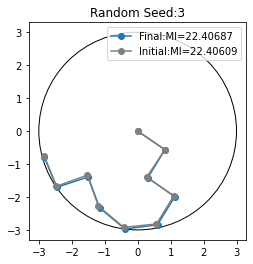

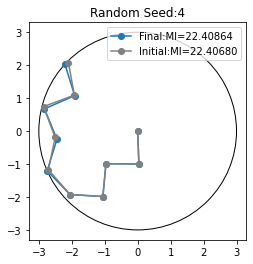

In [15]:
from RKHS import k

kernel = partial(k,c=c,l=l)


n_pass = 20


for seed in range(5):
    
    np.random.seed(seed)

    greedy = incremental_greedy(kernel,search_region_center,step_size,ref,R,T,var_0,c)

    iniMI = x_objective(np.array([greedy]))[0]
    
    x = np.array(greedy)

    x =  u_local_improve(x,x_objective,step_size,ref,R=R,n_pass = n_pass)

  

    MI = x_objective(np.array([x]))[0]
    plt.plot(x[:,0],x[:,1],marker='o',label='Final:MI={:.5f}'.format(MI))
    plt.plot(greedy[:,0],greedy[:,1],marker='o',label = 'Initial:MI={:.5f}'.format(iniMI),color = 'grey')
    
    ax = plt.gca()
    
    circ = plt.Circle(search_region_center,search_region_radius,fill=False)
    ax.add_patch(circ)
    ax.set_aspect('equal')
    
    plt.title("Random Seed:{}".format(seed))
    # plt.ylim((-5,5))
    # plt.xlim((-5,5))
    plt.legend()
    plt.show()